In [13]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### import data

In [14]:
ali_repo =pd.read_csv('/Users/ethan/Documents/DataScience/MQP/main_repo_df/Data/CommitData/C_alibaba_weex.csv', sep=",") 


In [15]:
#repo=pd.read_csv('data/CommitData/C_alibaba_weex.csv', sep=",")
repo = ali_repo

In [16]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12044 entries, 0 to 12043
Data columns (total 13 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   url                                                                                 12044 non-null  object
 1   sha                                                                                 12044 non-null  object
 2   owner                                                                               12044 non-null  object
 3   repo                                                                                12044 non-null  object
 4   author                                                                              11256 non-null  object
 5   date                                                                                12044 non-null  ob

In [17]:
repo.nunique()

url                                                                                   12044
sha                                                                                   12044
owner                                                                                     1
repo                                                                                      1
author                                                                                  195
date                                                                                  11732
totalAdditions                                                                         1314
totalDeletions                                                                          951
message                                                                               10201
numFiles                                                                                380
numComments                                                                     

### Data Cleaning


In [18]:
repo = repo.rename(columns={'fileTuples<fileName. status. additions. deletions. changes. raw_url. contents_url>': 'fileTuple'})

In [19]:
repo['net_code_change'] = repo['totalAdditions'] - repo['totalDeletions']

In [20]:
repo = repo[['url', 'repo', 'author', 'date','totalAdditions',
       'totalDeletions','net_code_change', 'message', 'numFiles', 'numComments',
       'fileTuple']]

In [21]:
repo = repo.sort_values(by='date', ascending=True)

#### Code freq

In [22]:
repo.head()

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple
12043,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11T10:18:12Z,203,0,203,Initial commit,2,0,"[('LICENSE', 'added', 201, 0, 201, 'https://gi..."
11892,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12T15:21:18Z,617,8351,-7734,+ [all] init,1046,0,"[('CONTRIBUTING.md', 'modified', 0, 0, 0, 'htt..."
12042,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12T15:21:18Z,142902,5,142897,+ [all] init,1054,1,"[('.gitignore', 'added', 23, 0, 23, 'https://g..."
12041,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12T15:22:31Z,30,6,24,+ [doc] contributing doc,2,0,"[('CONTRIBUTING.md', 'added', 28, 0, 28, 'http..."
12040,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12T16:00:06Z,32,16,16,* [doc] commit & branch format,2,0,"[('CONTRIBUTING.md', 'modified', 31, 11, 42, '..."


In [23]:
commit_data = repo

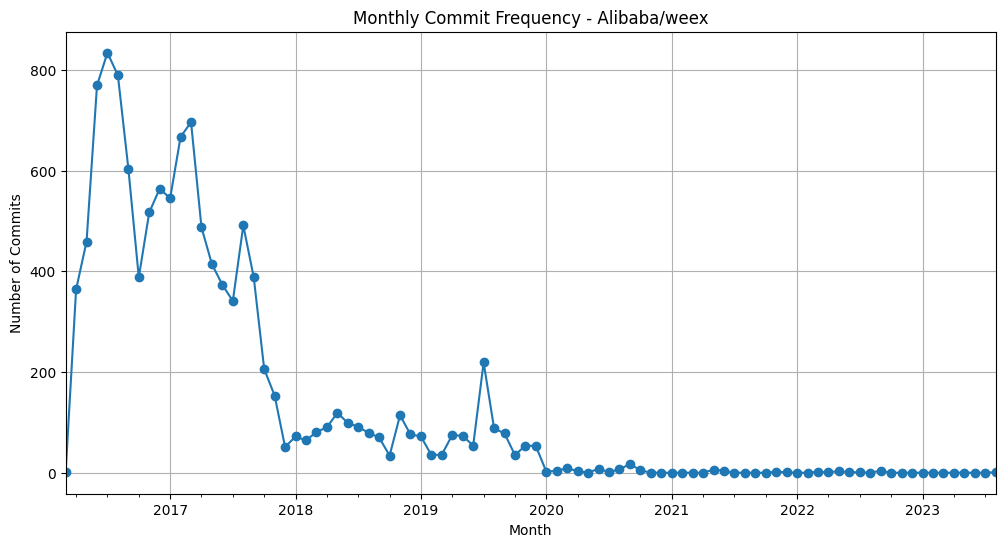

date
2023-04-30 00:00:00+00:00    0
2023-05-31 00:00:00+00:00    0
2023-06-30 00:00:00+00:00    0
2023-07-31 00:00:00+00:00    0
2023-08-31 00:00:00+00:00    1
Freq: M, dtype: int64

In [24]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
repo['date'] = pd.to_datetime(repo['date'])

# Resample by month and count the number of commits
monthly_commits = repo.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
monthly_commits.plot(kind='line', marker='o')
plt.title('Monthly Commit Frequency - Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.grid(True)
plt.show()

monthly_commits.tail()


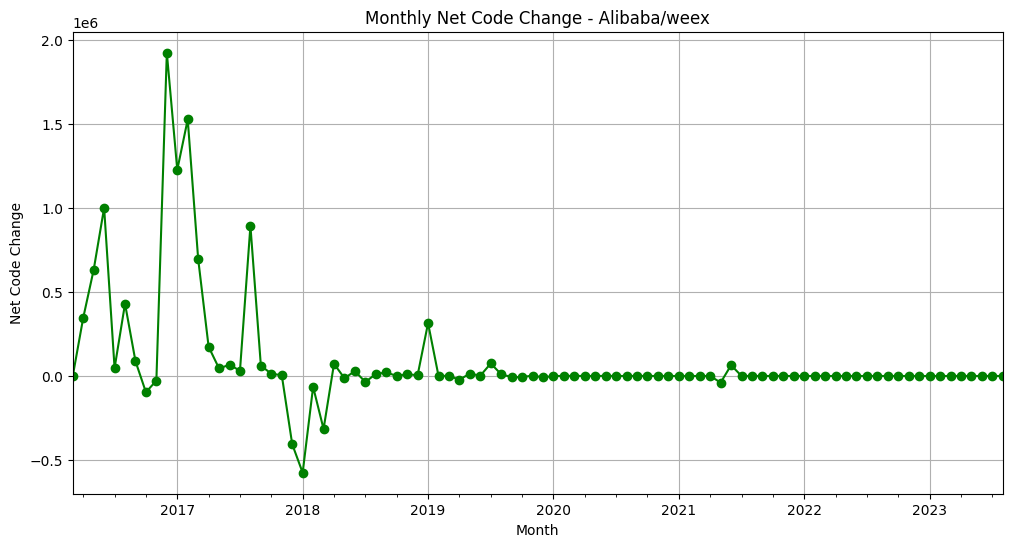

date
2023-04-30 00:00:00+00:00    0
2023-05-31 00:00:00+00:00    0
2023-06-30 00:00:00+00:00    0
2023-07-31 00:00:00+00:00    0
2023-08-31 00:00:00+00:00    1
Freq: M, Name: net_code_change, dtype: int64

In [25]:
import matplotlib.pyplot as plt

# month and sum the total additions
monthly_additions = repo.resample('M', on='date')['net_code_change'].sum()


plt.figure(figsize=(12, 6))
monthly_additions.plot(kind='line', marker='o', color='green')
plt.title('Monthly Net Code Change - Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Net Code Change')
plt.grid(True)
plt.show()

monthly_additions.tail()

##### author contribution

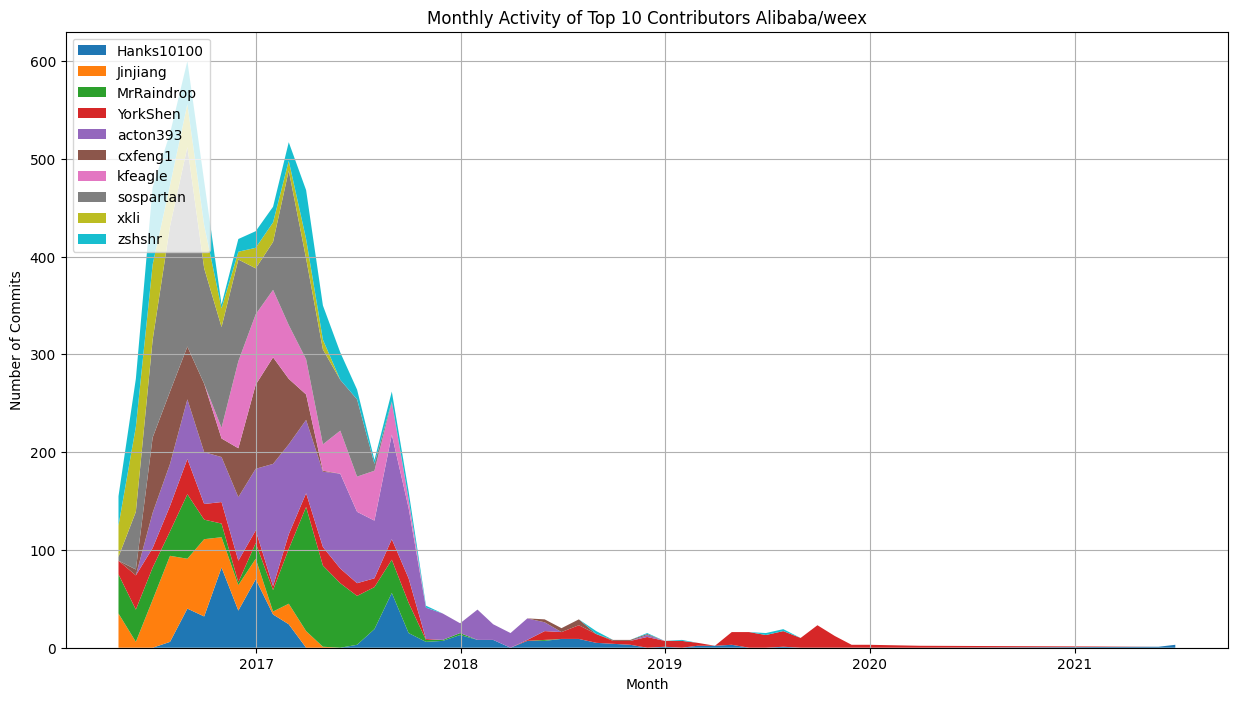

author,Hanks10100,Jinjiang,MrRaindrop,YorkShen,acton393,cxfeng1,kfeagle,sospartan,xkli,zshshr
date,,,,,,,,,,
2019-11-30 00:00:00+00:00,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 00:00:00+00:00,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-31 00:00:00+00:00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-31 00:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 00:00:00+00:00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import matplotlib.pyplot as plt

#  top ten authors
top_authors = repo['author'].value_counts().nlargest(10).index

top_authors_data = repo[repo['author'].isin(top_authors)]

top_authors_monthly_commits = top_authors_data.groupby(['author', pd.Grouper(freq='M', key='date')]).size().reset_index(name='num_commits')

top_pivot_table = top_authors_monthly_commits.pivot(index='date', columns='author', values='num_commits').fillna(0)


plt.figure(figsize=(15, 8))
plt.stackplot(top_pivot_table.index, top_pivot_table.values.T, labels=top_pivot_table.columns)
plt.title('Monthly Activity of Top 10 Contributors Alibaba/weex')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

top_pivot_table.tail()


#### commit Time difference 

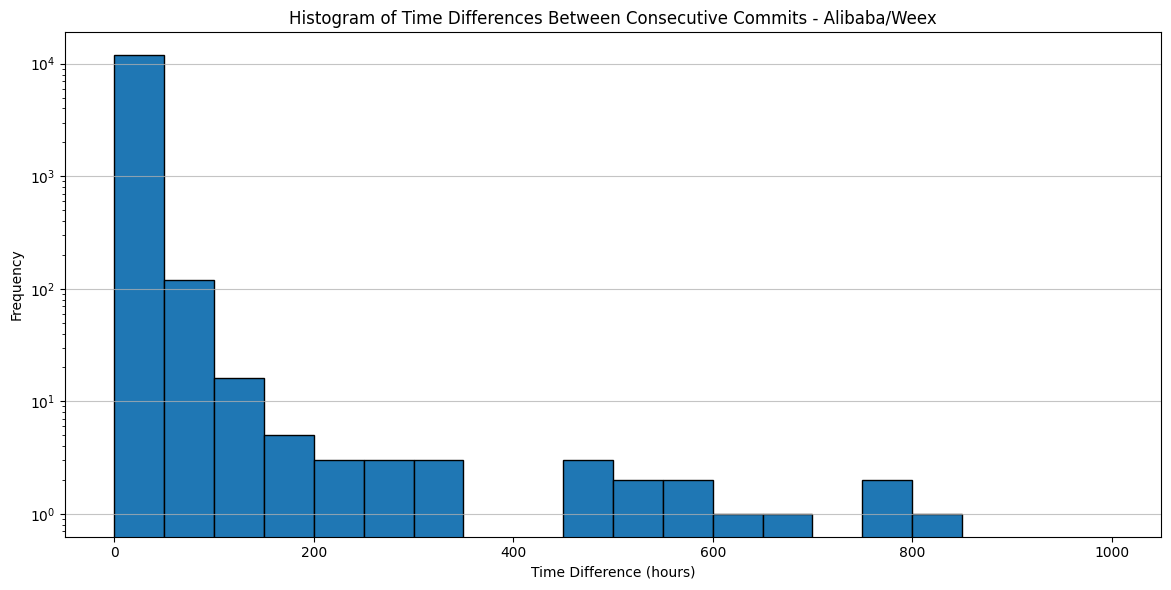

In [27]:
repo['time_diff'] = repo['date'].diff()
repo['time_diff'] = repo['time_diff'].fillna(pd.to_timedelta(0))
repo['time_diff_hours'] = repo['time_diff'].dt.total_seconds() / 3600

plt.figure(figsize=(12, 6))
plt.hist(repo['time_diff_hours'], bins=20, edgecolor='black', range=(0, 1000))  
plt.title('Histogram of Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

plt.yscale('log')

plt.show()

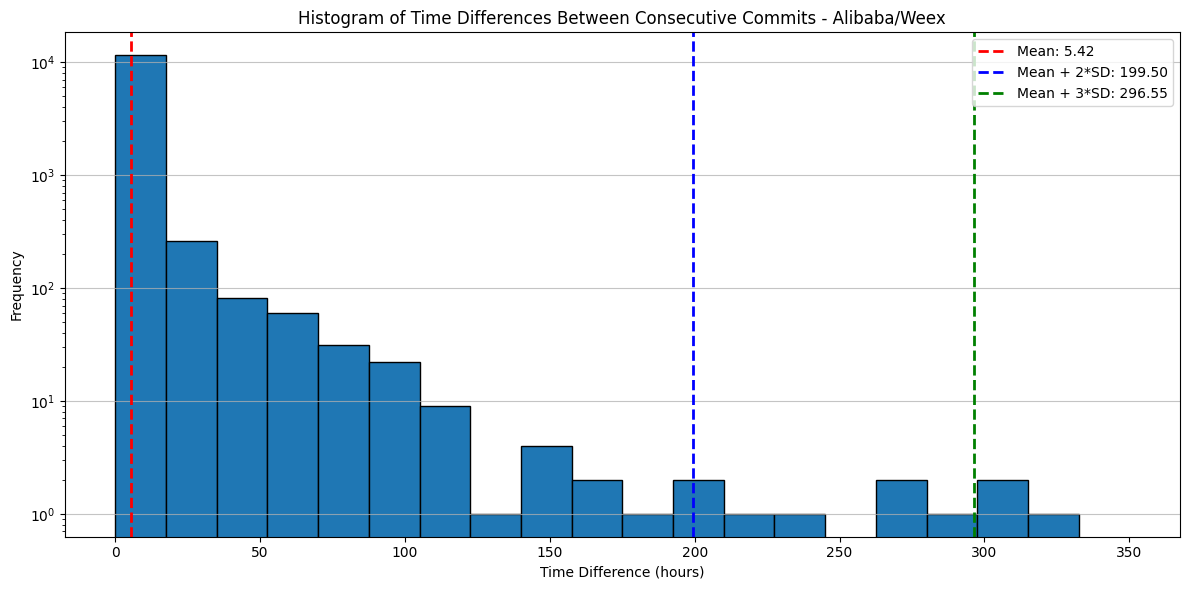

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'repo' is your DataFrame with commit information
repo['time_diff'] = repo['date'].diff()
repo['time_diff'] = repo['time_diff'].fillna(pd.to_timedelta(0))
repo['time_diff_hours'] = repo['time_diff'].dt.total_seconds() / 3600

# Plotting histogram
plt.figure(figsize=(12, 6))
plt.hist(repo['time_diff_hours'], bins=20, edgecolor='black', range=(0, 350))  
plt.title('Histogram of Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Log-scale y-axis
plt.yscale('log')

#  mean line
mean_value = repo['time_diff_hours'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

#  second standard deviation (SD) line
std_value = repo['time_diff_hours'].std()
second_sd_line = mean_value + 2 * std_value
plt.axvline(second_sd_line, color='blue', linestyle='dashed', linewidth=2, label=f'Mean + 2*SD: {second_sd_line:.2f}')

second_sd_line = mean_value + 3 * std_value
plt.axvline(second_sd_line, color='green', linestyle='dashed', linewidth=2, label=f'Mean + 3*SD: {second_sd_line:.2f}')

plt.legend() 

plt.tight_layout()
plt.show()


In [29]:
repo

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,time_diff,time_diff_hours
12043,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11 10:18:12+00:00,203,0,203,Initial commit,2,0,"[('LICENSE', 'added', 201, 0, 201, 'https://gi...",0 days 00:00:00,0.000000
11892,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,617,8351,-7734,+ [all] init,1046,0,"[('CONTRIBUTING.md', 'modified', 0, 0, 0, 'htt...",32 days 05:03:06,773.051667
12042,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,142902,5,142897,+ [all] init,1054,1,"[('.gitignore', 'added', 23, 0, 23, 'https://g...",0 days 00:00:00,0.000000
12041,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:22:31+00:00,30,6,24,+ [doc] contributing doc,2,0,"[('CONTRIBUTING.md', 'added', 28, 0, 28, 'http...",0 days 00:01:13,0.020278
12040,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 16:00:06+00:00,32,16,16,* [doc] commit & branch format,2,0,"[('CONTRIBUTING.md', 'modified', 31, 11, 42, '...",0 days 00:37:35,0.626389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,https://api.github.com/repos/alibaba/weex/comm...,weex,katherine95s,2022-09-07 13:19:18+00:00,2,1,1,fix:修复OnReceivedResult CallbackId (#3313) * [...,1,0,[('weex_core/Source/android/bridge/script_brid...,63 days 06:04:41,1518.078056
3,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 03:42:59+00:00,8,0,8,[ios]fix maxlength issues (#3312),1,0,[('ios/sdk/WeexSDK/Sources/Component/WXEditCom...,20 days 14:23:41,494.394722
2,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 03:44:41+00:00,2,0,2,[ios]fix date|time reset issues (#3311),1,0,[('ios/sdk/WeexSDK/Sources/Component/WXEditCom...,0 days 00:01:42,0.028333
1,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 06:06:08+00:00,7,3,4,[ios]Fixed the problem that the list was not a...,1,0,[('ios/sdk/WeexSDK/Sources/Component/WXLoading...,0 days 02:21:27,2.357500


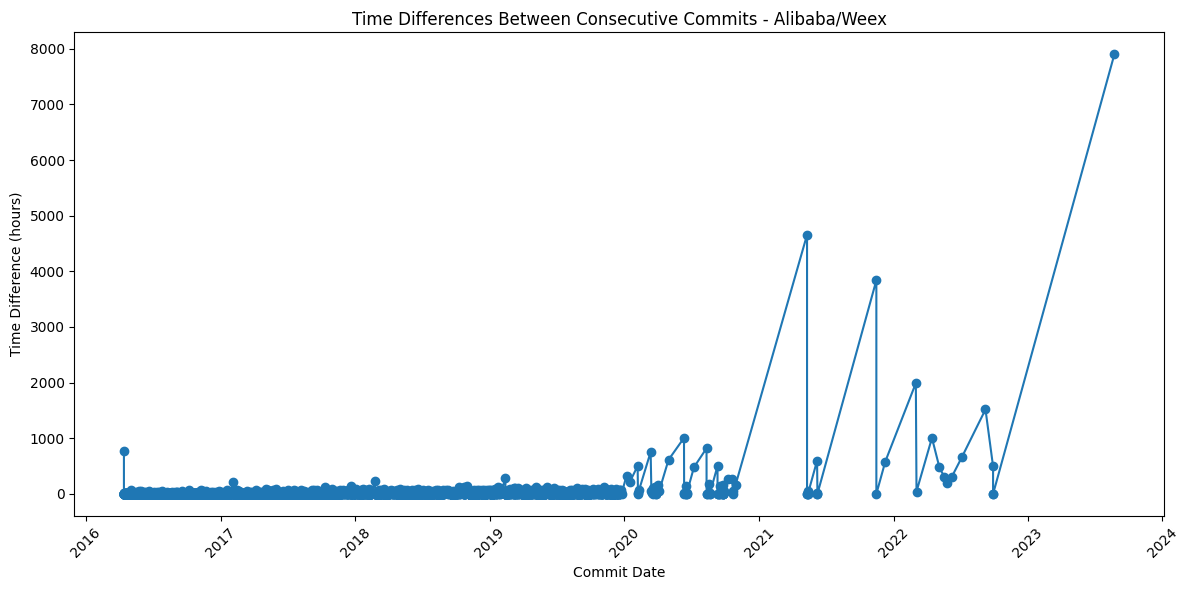

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate time differences between consecutive commits
repo['time_diff'] = repo['date'].diff()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'commit_date': repo['date'],
    'time_diff': repo['time_diff']
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_data['commit_date'], plot_data['time_diff'].dt.total_seconds() / 3600, marker='o', linestyle='-')
plt.title('Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Commit Date')
plt.ylabel('Time Difference (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
repo

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,time_diff,time_diff_hours
12043,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11 10:18:12+00:00,203,0,203,Initial commit,2,0,"[('LICENSE', 'added', 201, 0, 201, 'https://gi...",NaT,0.000000
11892,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,617,8351,-7734,+ [all] init,1046,0,"[('CONTRIBUTING.md', 'modified', 0, 0, 0, 'htt...",32 days 05:03:06,773.051667
12042,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,142902,5,142897,+ [all] init,1054,1,"[('.gitignore', 'added', 23, 0, 23, 'https://g...",0 days 00:00:00,0.000000
12041,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:22:31+00:00,30,6,24,+ [doc] contributing doc,2,0,"[('CONTRIBUTING.md', 'added', 28, 0, 28, 'http...",0 days 00:01:13,0.020278
12040,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 16:00:06+00:00,32,16,16,* [doc] commit & branch format,2,0,"[('CONTRIBUTING.md', 'modified', 31, 11, 42, '...",0 days 00:37:35,0.626389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,https://api.github.com/repos/alibaba/weex/comm...,weex,katherine95s,2022-09-07 13:19:18+00:00,2,1,1,fix:修复OnReceivedResult CallbackId (#3313) * [...,1,0,[('weex_core/Source/android/bridge/script_brid...,63 days 06:04:41,1518.078056
3,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 03:42:59+00:00,8,0,8,[ios]fix maxlength issues (#3312),1,0,[('ios/sdk/WeexSDK/Sources/Component/WXEditCom...,20 days 14:23:41,494.394722
2,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 03:44:41+00:00,2,0,2,[ios]fix date|time reset issues (#3311),1,0,[('ios/sdk/WeexSDK/Sources/Component/WXEditCom...,0 days 00:01:42,0.028333
1,https://api.github.com/repos/alibaba/weex/comm...,weex,yuditxj,2022-09-28 06:06:08+00:00,7,3,4,[ios]Fixed the problem that the list was not a...,1,0,[('ios/sdk/WeexSDK/Sources/Component/WXLoading...,0 days 02:21:27,2.357500


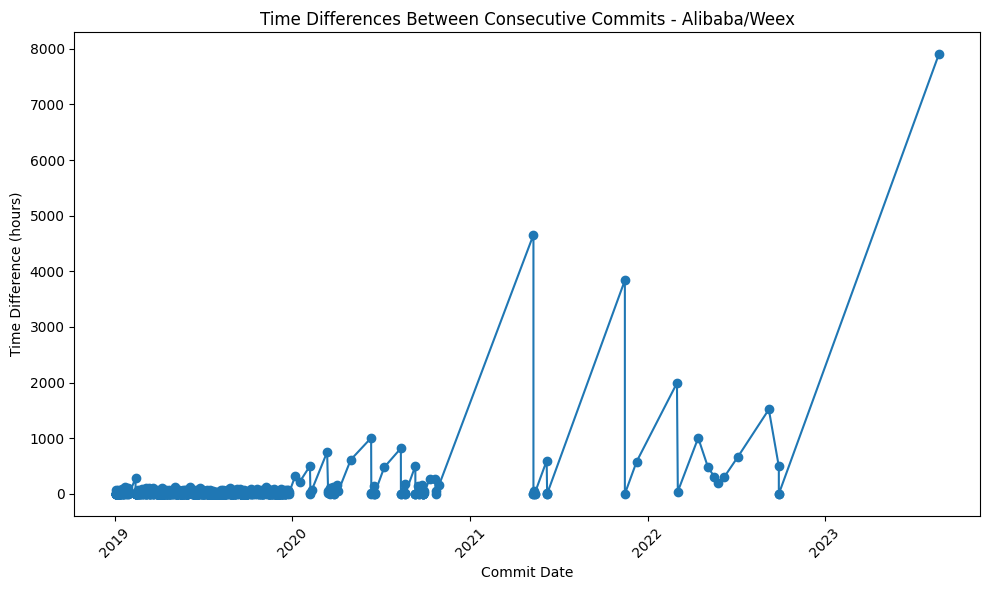

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'repo' is your DataFrame and 'date' is in datetime format.
# Calculate time differences between consecutive commits
repo['time_diff'] = repo['date'].diff()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'commit_date': repo['date'],
    'time_diff': repo['time_diff']
})

# Convert '2019-01-01' to datetime with UTC timezone to match 'commit_date'
start_date = pd.to_datetime('2019-01-01', utc=True)

# Filter data for 2019 and onwards, ensuring timezone compatibility
plot_data_filtered = plot_data[plot_data['commit_date'] >= start_date]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(plot_data_filtered['commit_date'], plot_data_filtered['time_diff'].dt.total_seconds() / 3600, marker='o', linestyle='-')
plt.title('Time Differences Between Consecutive Commits - Alibaba/Weex')
plt.xlabel('Commit Date')
plt.ylabel('Time Difference (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_17396\1343960593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_repo['time_diff'] = filtered_repo['date'].diff()


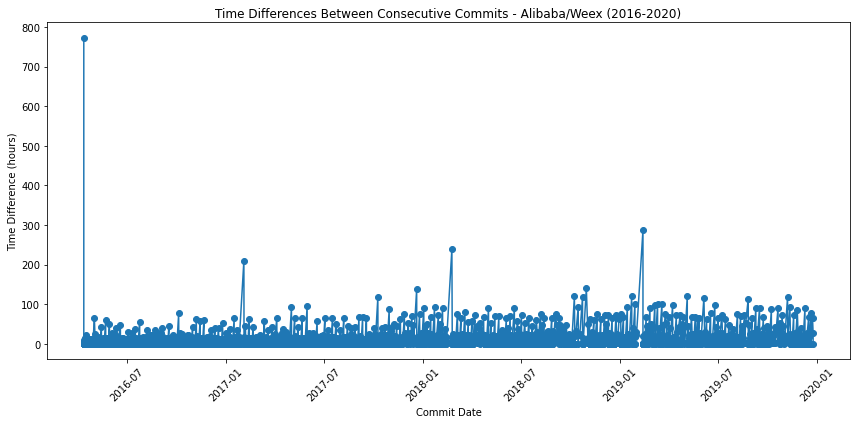

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming repo is your DataFrame

# Filter commits between 2016 and 2020
filtered_repo = repo[(repo['date'] >= '2016-01-01') & (repo['date'] <= '2020-01-1')]

# Calculate time differences between consecutive commits
filtered_repo['time_diff'] = filtered_repo['date'].diff()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'commit_date': filtered_repo['date'],
    'time_diff': filtered_repo['time_diff']
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_data['commit_date'], plot_data['time_diff'].dt.total_seconds() / 3600, marker='o', linestyle='-')
plt.title('Time Differences Between Consecutive Commits - Alibaba/Weex (2016-2020)')
plt.xlabel('Commit Date')
plt.ylabel('Time Difference (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Code latency 

In [20]:

# Calculate statistics for code review latency
average_latency = repo['time_diff_hours'].mean()
median_latency = repo['time_diff_hours'].median()
max_latency = repo['time_diff_hours'].max()

print(f"Average Code  Latency: {average_latency:.2f} hours")
print(f"Median Code  Latency: {median_latency:.2f} hours")
print(f"Maximum Code  Latency: {max_latency:.2f} hours")

Average Code  Latency: 5.42 hours
Median Code  Latency: 0.24 hours
Maximum Code  Latency: 7900.86 hours


#### FileTuple

In [21]:
import pandas as pd

# Convert the 'fileTuple' column from a list to a string
repo['fileTuple'] = repo['fileTuple'].apply(str)

# Parse the 'fileTuple' column to extract file information using ast.literal_eval
import ast
repo['fileTuple'] = repo['fileTuple'].apply(ast.literal_eval)

# Create a new DataFrame to store file-level information
file_df = pd.DataFrame()

# Iterate through each row of the original DataFrame
for index, row in repo.iterrows():
    commit_files = row['fileTuple']
    for file_info in commit_files:
        file_dict = {
            'url': row['url'],
            'file_name': file_info[0],
            'status': file_info[1],
            'additions': file_info[2],
            'deletions': file_info[3],
            'changes': file_info[4],
            'raw_url': file_info[5],
            'contents_url': file_info[6]
        }
        # Use concat to append rows to the DataFrame
        file_df = pd.concat([file_df, pd.DataFrame([file_dict])], ignore_index=True)

# Group the file DataFrame by 'file_name' and sum the changes
file_changes = file_df.groupby('file_name')['changes'].sum()

# Sort the files based on the total changes in descending order
sorted_files = file_changes.sort_values(ascending=False)

# Display the files with the most commit changes
print(sorted_files.head())


file_name
android/sdk/assets/main.js                                             1530159
packages/weex-js-framework/index.js                                     930548
ios/sdk/WeexSDK/Resources/main.js                                       532047
packages/weex-html5/index.js                                            426569
android/playground/app/src/main/assets/showcase/new-fashion/main.js     277287
Name: changes, dtype: int64


In [22]:
file_changes

file_name
.DS_Store                                                   0
.babelrc                                                    0
.eslintignore                                             183
.eslintrc                                                2111
.flowconfig                                               328
                                                        ...  
weex_core/test/third_party/googletest/library.json         59
weex_core/test/third_party/googletest/platformio.ini       31
weex_core/tools/cpp-style-check.sh                        174
weex_core/tools/cpplint.py                              12410
weex_core/trace.sh                                          2
Name: changes, Length: 10429, dtype: int64

In [23]:
sorted_files

file_name
android/sdk/assets/main.js                                                         1530159
packages/weex-js-framework/index.js                                                 930548
ios/sdk/WeexSDK/Resources/main.js                                                   532047
packages/weex-html5/index.js                                                        426569
android/playground/app/src/main/assets/showcase/new-fashion/main.js                 277287
                                                                                    ...   
playground/android/playground/src/main/res/drawable-xhdpi/ic_action_scan.png             0
playground/android/playground/src/main/res/drawable-xhdpi/ic_action_refresh.png          0
playground/android/playground/src/main/res/drawable-mdpi/ic_action_scan.png              0
playground/android/playground/src/main/res/drawable-mdpi/ic_action_refresh.png           0
.DS_Store                                                                       

In [26]:
# Assuming file_df is the DataFrame with file-level information
# Merge file_df with the original repo DataFrame on 'url' to get commit date
merged_df = pd.merge(file_df, repo[['url', 'date']], on='url')

# Display the resulting DataFrame with file name, net code change, and commit date
result_df = merged_df[['file_name', 'changes', 'date']]

# Sort the resulting DataFrame by the 'changes' column in descending order
result_df = result_df.sort_values(by='changes', ascending=False)

result_df

,file_name,changes,date
210909,pre-build/native-bundle-main.js,45196,2017-09-19 08:15:47+00:00
210958,pre-build/native-bundle-main.js,44602,2017-09-20 12:16:08+00:00
212105,packages/weex-js-framework/index.js,44451,2017-09-25 15:06:51+00:00
212382,packages/weex-js-framework/index.js,44451,2017-09-26 03:24:07+00:00
213222,packages/weex-js-framework/index.js,44451,2017-10-16 03:10:17+00:00
...,...,...,...
65365,ios/WXDevtool/WXDevTool/Source/PonyDebugger/Po...,0,2016-08-16 02:34:16+00:00
65364,ios/WXDevtool/WXDevTool/Source/PonyDebugger/PD...,0,2016-08-16 02:34:16+00:00
65363,ios/WXDevtool/WXDevTool/Source/PonyDebugger/PD...,0,2016-08-16 02:34:16+00:00
65362,ios/WXDevtool/WXDevTool/Source/PonyDebugger/PD...,0,2016-08-16 02:34:16+00:00


### Numerical df

In [27]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12044 entries, 12043 to 0
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   url              12044 non-null  object             
 1   repo             12044 non-null  object             
 2   author           11256 non-null  object             
 3   date             12044 non-null  datetime64[ns, UTC]
 4   totalAdditions   12044 non-null  int64              
 5   totalDeletions   12044 non-null  int64              
 6   net_code_change  12044 non-null  int64              
 7   message          12044 non-null  object             
 8   numFiles         12044 non-null  int64              
 9   numComments      12044 non-null  int64              
 10  fileTuple        12044 non-null  object             
 11  time_diff        12043 non-null  timedelta64[ns]    
 12  time_diff_hours  12044 non-null  float64            
dtypes: datetime64[ns

In [28]:
num_df = repo
# Creating a new DataFrame with only numerical features
num_df = ['author','totalAdditions', 'totalDeletions', 'numFiles', 'numComments']

# Selecting only the numerical features from the original dataset
num_df = repo[num_df]


In [29]:
repo.head(3)

,url,repo,author,date,totalAdditions,totalDeletions,net_code_change,message,numFiles,numComments,fileTuple,time_diff,time_diff_hours
12043,https://api.github.com/repos/alibaba/weex/comm...,weex,lvscar,2016-03-11 10:18:12+00:00,203,0,203,Initial commit,2,0,"[(LICENSE, added, 201, 0, 201, https://github....",NaT,0.000000
11892,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,617,8351,-7734,+ [all] init,1046,0,"[(CONTRIBUTING.md, modified, 0, 0, 0, https://...",32 days 05:03:06,773.051667
12042,https://api.github.com/repos/alibaba/weex/comm...,weex,luics,2016-04-12 15:21:18+00:00,142902,5,142897,+ [all] init,1054,1,"[(.gitignore, added, 23, 0, 23, https://github...",0 days 00:00:00,0.000000


#### OneHotEncoder

In [30]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Reshape the 'artists' column
artists_column = num_df['author'].values.reshape(-1, 1)

# Fit and transform the one-hot encoding on the 'artists' column
one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

num_df['author'] = np.argmax(one_hot_encoded_artists, axis=1)
num_df['net_code_change'] = num_df['totalAdditions'] - num_df['totalDeletions']


C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_17396\1322002274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['author'] = np.argmax(one_hot_encoded_artists, axis=1)
C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_17396\1322002274.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['net_code_change'] = num_df['totalAdditions'] - num_df['totalDeletions']


In [31]:
num_df.head()

,author,totalAdditions,totalDeletions,numFiles,numComments,net_code_change
12043,116,203,0,2,0,203
11892,112,617,8351,1046,0,-7734
12042,112,142902,5,1054,1,142897
12041,112,30,6,2,0,24
12040,112,32,16,2,0,16


In [32]:
num_df.isnull().sum()

author             0
totalAdditions     0
totalDeletions     0
numFiles           0
numComments        0
net_code_change    0
dtype: int64

In [33]:
num_df.describe()

,author,totalAdditions,totalDeletions,numFiles,numComments,net_code_change
count,12044.000000,12044.000000,12044.000000,12044.000000,12044.000000,12044.000000
mean,93.616739,1496.400448,814.133760,19.868731,0.000664,682.266689
std,61.651193,10562.719494,7501.389066,106.041675,0.034089,9468.967788
min,0.000000,0.000000,0.000000,0.000000,0.000000,-322384.000000
25%,34.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,92.000000,10.000000,4.000000,2.000000,0.000000,3.000000
75%,144.000000,60.000000,20.000000,4.000000,0.000000,27.000000
max,195.000000,376365.000000,399791.000000,2757.000000,3.000000,314465.000000
